### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,8
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import math
from sklearn.preprocessing import LabelEncoder

### Importing models.

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR

### Loading the data.

In [3]:
df = pd.read_csv('co2_emissions (1).csv',sep=';')
df.sample(5)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
2394,CADILLAC,SRX AWD,SUV - STANDARD,3.6,6,AS,X,14.8,10.4,12.8,22,300
2701,HONDA,ACCORD SEDAN,MID-SIZE,3.5,6,A,X,11.3,7.0,9.4,30,219
4263,SUBARU,IMPREZA 4-DOOR AWD,MID-SIZE,2.0,4,AV,X,8.3,6.4,7.5,38,174
1004,TOYOTA,TACOMA 4WD,PICKUP TRUCK - SMALL,2.7,4,A,X,13.1,10.5,11.9,24,274
6839,FORD,Transit Connect Van LWB,SPECIAL PURPOSE VEHICLE,2.0,4,AS,X,9.8,8.8,9.3,30,219


In [4]:
df.shape

(7385, 12)

## Preprocessing

In [5]:
def preprocessing1(df,variable):
        df=df.drop_duplicates()
        percentile25 = df[variable].quantile(0.25)
        #print(percentile25)
        percentile75 = df[variable].quantile(0.75)
        #print(percentile75)
        iqr = percentile75-percentile25
        #print(iqr)
        upper_limit = percentile75 + 1.5 * iqr
        #print(upper_limit)
        lower_limit = percentile25 - 1.5 * iqr
        #print(lower_limit)
        #removing
        new_df = df[(df[variable]) < (upper_limit)]
        print(new_df.shape)
        return new_df

In [6]:
df=preprocessing1(df,'co2_emissions')
df=preprocessing1(df,'fuel_consumption_comb(l/100km)')

(6199, 12)
(6122, 12)


In [7]:
df = df.sample(frac = 1,random_state=4)

In [8]:
le_make = LabelEncoder()
le_model = LabelEncoder()
le_veh = LabelEncoder()
le_tran = LabelEncoder()
le_fuel = LabelEncoder()

In [9]:
#label Encoding
df['make'] = le_make.fit_transform(df['make'])
df['model']  = le_model.fit_transform(df['model'])
df['vehicle_class']  = le_veh.fit_transform(df['vehicle_class'])
df['transmission']  =le_tran.fit_transform(df['transmission'])
df['fuel_type']  = le_fuel.fit_transform(df['fuel_type'])

### Selecting only decided features for future model building and splitting the dataset .

In [10]:
Xi = df[['make','model','vehicle_class','engine_size','cylinders','transmission','fuel_type','fuel_consumption_comb(l/100km)']]
Y = df['co2_emissions']

In [11]:
#Xi = df.drop('co2_emissions',axis=1)
#Y = df['co2_emissions']

#### Scaling the Values.

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(Xi)
X

array([[ 1.79049053, -0.07661689, -1.29767916, ...,  0.11161862,
        -0.34233436, -1.03715934],
       [ 0.28848339, -0.53302303,  1.00698643, ...,  0.11161862,
         0.82327795, -0.11612032],
       [-1.39023046, -1.28433775,  0.58795632, ...,  0.11161862,
         0.82327795, -0.11612032],
       ...,
       [-0.06493005,  1.68756839, -1.0881641 , ...,  0.11161862,
         0.82327795,  0.42115244],
       [-1.03681702, -0.73489498, -0.87864905, ...,  0.11161862,
         0.82327795,  2.22485386],
       [-1.21352374,  0.24462282,  0.79747138, ...,  0.11161862,
         0.82327795, -0.2312502 ]])

In [13]:
 X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [14]:
def demo_models(Model,X_TRAIN,X_TEST,Y_TRAIN,Y_TEST):
    model = Model
    model.fit(X_TRAIN,Y_TRAIN)
    a=r2_score(Y_TRAIN,model.predict(X_TRAIN))
    b=np.sqrt(mean_squared_error(Y_TRAIN,model.predict(X_TRAIN)))
    c=r2_score(Y_TEST,model.predict(X_TEST))
    d=np.sqrt(mean_squared_error(Y_TEST,model.predict(X_TEST)))
    return(print(f"•The Summary for 👉{Model} is:-\n → For Training data : \n    ‣ r2score    = {'%.4f'%a}\n    ‣ RMSE value = {'%.4f'%b}\n → For Validation data : \n    ‣ r2score    = {'%.4f'%c} \n    ‣ RMSE value = {'%.4f'%d}"))

---

### LinearRegression

In [15]:
demo_models(LinearRegression(),X_train, X_test, Y_train, Y_test)

•The Summary for 👉LinearRegression() is:-
 → For Training data : 
    ‣ r2score    = 0.9076
    ‣ RMSE value = 16.8210
 → For Validation data : 
    ‣ r2score    = 0.9087 
    ‣ RMSE value = 16.9384


***
### Lasso and Ridge

In [16]:
demo_models(Lasso(alpha=0.5),X_train, X_test, Y_train, Y_test)

•The Summary for 👉Lasso(alpha=0.5) is:-
 → For Training data : 
    ‣ r2score    = 0.9073
    ‣ RMSE value = 16.8549
 → For Validation data : 
    ‣ r2score    = 0.9082 
    ‣ RMSE value = 16.9819


---

In [17]:
demo_models(Ridge(),X_train, X_test, Y_train, Y_test)

•The Summary for 👉Ridge() is:-
 → For Training data : 
    ‣ r2score    = 0.9076
    ‣ RMSE value = 16.8211
 → For Validation data : 
    ‣ r2score    = 0.9087 
    ‣ RMSE value = 16.9384


---

### Support vector Machines

In [18]:
demo_models(SVR(C=1.0, epsilon=0.2),X_train, X_test, Y_train, Y_test)

•The Summary for 👉SVR(epsilon=0.2) is:-
 → For Training data : 
    ‣ r2score    = 0.9342
    ‣ RMSE value = 14.1928
 → For Validation data : 
    ‣ r2score    = 0.9408 
    ‣ RMSE value = 13.6433


---

### Decision Trees

In [19]:
demo_models(DecisionTreeRegressor(),X_train, X_test, Y_train, Y_test)

•The Summary for 👉DecisionTreeRegressor() is:-
 → For Training data : 
    ‣ r2score    = 0.9996
    ‣ RMSE value = 1.1384
 → For Validation data : 
    ‣ r2score    = 0.9966 
    ‣ RMSE value = 3.2697


---

### Random forest.

In [20]:
demo_models(RandomForestRegressor(),X_train, X_test, Y_train, Y_test)

•The Summary for 👉RandomForestRegressor() is:-
 → For Training data : 
    ‣ r2score    = 0.9990
    ‣ RMSE value = 1.7279
 → For Validation data : 
    ‣ r2score    = 0.9973 
    ‣ RMSE value = 2.8866


------------------------------------------------------------------------------------------------------

### XGBoost

In [17]:
demo_models(xgb.XGBRegressor(),X_train, X_test, Y_train, Y_test)

•The Summary for 👉XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) is:-
 → For Training data : 
    ‣ r2score    = 0.9990
    ‣ RMSE value = 1.7309
 → For Validation data : 
    ‣ r2score    = 0.9977 
    ‣ RMSE value = 2.6665


---

# Conclusion :


- Out of all the models XGBoost performs best.
- The Root mean squared value is 2.66 which is very good.
- we will find the best hyper parameters for XGBoost using GridSearchcv and, use it  as our final model.

======================================================================================================

## HyperParameter Tuning for XGBoost.

In [18]:
X_train.shape

(4897, 8)

In [47]:
from sklearn.model_selection import GridSearchCV, KFold

In [48]:
params1 = {'n_estimators': [200,400, 700,1000]}
params2= {'max_depth': [5,6,7,8,10]}
params3 = {'learning_rate': [0.01, 0.05, 0.1,0.3,0.03]}
params= {'n_estimators': [400, 700],'max_depth': [7,8,9,10],'learning_rate': [0.01, 0.05, 0.1,0.3,0.03]}

In [55]:
xgbr = xgb.XGBRegressor(njobs=-1)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_root_mean_squared_error', 
                   verbose=1)

In [56]:
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[18:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Paramete

[18:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:42:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:42:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false al

[18:43:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:43:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:43:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false al

[18:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false al

[18:44:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:44:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false al

[18:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:45:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false al

[18:46:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false al

[18:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false al

[18:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false al

[18:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:48:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false al

[18:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...obs=None, njobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                            

In [57]:
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_))

Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400}
Lowest RMSE:  3.409141115161593


---

In [19]:
demo_models(xgb.XGBRegressor(learning_rate=0.05,max_depth=8,n_estimators=400),X_train, X_test, Y_train, Y_test)

•The Summary for 👉XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) is:-
 → For Training data : 
    ‣ r2score    = 0.9992
    ‣ RMSE value = 1.5698
 → For Validation data : 
    ‣ r2score    = 0.9981 
    ‣ RMSE value = 2.4701


In [20]:
demo_models(xgb.XGBRegressor(learning_rate=0.03,max_depth=10,n_estimators=400),X_train, X_test, Y_train, Y_test)

•The Summary for 👉XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) is:-
 → For Training data : 
    ‣ r2score    = 0.9992
    ‣ RMSE value = 1.5504
 → For Validation data : 
    ‣ r2score    = 0.9980 
    ‣ RMSE value = 2.5213


---

# Building final Model

In [21]:
model = xgb.XGBRegressor(learning_rate=0.03,max_depth=7,n_estimators=400)

In [22]:
model.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [23]:
Xi.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_comb(l/100km)'],
      dtype='object')

In [24]:
for i in range(7):
    print(math.fabs(model.feature_importances_[i] * 100))

0.04052012809552252
0.038657107506878674
0.11127440957352519
0.29152706265449524
0.07288725464604795
0.02971348585560918
23.30467253923416


# Building a predicive system

In [25]:
input_data = pd.DataFrame({'make':'BMW','model':'M6','vehicle_class':'COMPACT',
                          'engine_size':4.4,'cylinders':8,'transmission':'AM','fuel_type':'Z',
                           'fuel_consumption_comb(l/100km)':14.7},index=[1])
input_data['make'] = le_make.fit_transform(input_data['make'])
input_data['model']  = le_model.fit_transform(input_data['model'])
input_data['vehicle_class']  = le_veh.fit_transform(input_data['vehicle_class'])
input_data['transmission']  =le_tran.fit_transform(input_data['transmission'])
input_data['fuel_type']  = le_fuel.fit_transform(input_data['fuel_type'])
input_data = scaler.transform(input_data)
pred =abs(model.predict(input_data))
print("The Co2 emmitted from your car is {} in grams per kilometer.".format(pred))
#338

The Co2 emmitted from your car is [247.19853] in grams per kilometer.


### Taking input from the user:

In [39]:
i1 = input("Enter Company name :") 
i2 = input("Enter model :")
i3 = input("Enter vehicle class :")
i4 = input("Enter engine size :")
i8 = input("Enter Number of cylinders :")
i5 = input("Enter Transmission type :")
i6 = input("Enter Fuel type :")
i7 = input("Enter the combined fuel consumption rating (55% city, 45% highway), in L/100 km :")

input_data = pd.DataFrame({'make':i1,'model':i2,'vehicle_class':i3,
                          'engine_size':i4,'cylinders':i8,'transmission':i5,'fuel_type':i6,
                           'fuel_consumption_comb(l/100km)':i7},index=[1])
input_data['make'] = le_make.fit_transform(input_data['make'])
input_data['model']  = le_model.fit_transform(input_data['model'])
input_data['vehicle_class']  = le_veh.fit_transform(input_data['vehicle_class'])
input_data['transmission']  =le_tran.fit_transform(input_data['transmission'])
input_data['fuel_type']  = le_fuel.fit_transform(input_data['fuel_type'])
input_data = scaler.transform(input_data)
pred =model.predict(input_data)
print('————————————※→🚦🚗 :')
print(f"The Co2 emmitted from your car is {pred} in grams per kilometer.")

Enter Company name :ACURA
Enter model :RLX
Enter vehicle class :MID-SIZE
Enter engine size :3.5
Enter Number of cylinders :6
Enter Transmission type :AS
Enter Fuel type :Z
Enter the combined fuel consumption rating (55% city, 45% highway), in L/100 km :10
————————————※→🚦🚗 :
The Co2 emmitted from your car is [267.58255] in grams per kilometer.


===============================================================================================

# DEEP LEARNING MODEL

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.python.keras.initializers import initializers_v1
from tensorflow.python.keras.initializers import initializers_v2
from tensorflow.python.keras.utils import generic_utils
from tensorflow.python.keras.utils import tf_inspect as inspect
from tensorflow.python.keras.utils import np_utils

In [68]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_DL = tf.keras.Sequential()
model_DL.add(Dense(128,kernel_initializer='uniform',input_dim=8,activation='relu'))
model_DL.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model_DL.add(Dense(1,activation='linear')) #Output layer
model_DL.compile(optimizer=opt,
                 loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [69]:
regressor = model_DL.fit(X,Y,epochs=1000,verbose=3,validation_data=(X_test,Y_test),use_multiprocessing=True)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

Epoch 555/1000
Epoch 556/1000
Epoch 557/1000
Epoch 558/1000
Epoch 559/1000
Epoch 560/1000
Epoch 561/1000
Epoch 562/1000
Epoch 563/1000
Epoch 564/1000
Epoch 565/1000
Epoch 566/1000
Epoch 567/1000
Epoch 568/1000
Epoch 569/1000
Epoch 570/1000
Epoch 571/1000
Epoch 572/1000
Epoch 573/1000
Epoch 574/1000
Epoch 575/1000
Epoch 576/1000
Epoch 577/1000
Epoch 578/1000
Epoch 579/1000
Epoch 580/1000
Epoch 581/1000
Epoch 582/1000
Epoch 583/1000
Epoch 584/1000
Epoch 585/1000
Epoch 586/1000
Epoch 587/1000
Epoch 588/1000
Epoch 589/1000
Epoch 590/1000
Epoch 591/1000
Epoch 592/1000
Epoch 593/1000
Epoch 594/1000
Epoch 595/1000
Epoch 596/1000
Epoch 597/1000
Epoch 598/1000
Epoch 599/1000
Epoch 600/1000
Epoch 601/1000
Epoch 602/1000
Epoch 603/1000
Epoch 604/1000
Epoch 605/1000
Epoch 606/1000
Epoch 607/1000
Epoch 608/1000
Epoch 609/1000
Epoch 610/1000
Epoch 611/1000
Epoch 612/1000
Epoch 613/1000
Epoch 614/1000
Epoch 615/1000
Epoch 616/1000
Epoch 617/1000
Epoch 618/1000
Epoch 619/1000
Epoch 620/1000
Epoch 621/

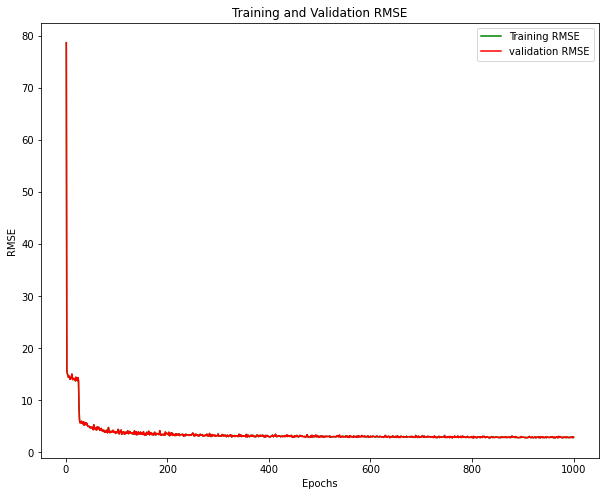

In [70]:
rmse = (regressor.history['root_mean_squared_error'])
val_rmse = regressor.history['root_mean_squared_error']
epochs = range(1,len(rmse)+1)
plt.plot(epochs,rmse,'g',label='Training RMSE')
plt.plot(epochs,val_rmse,'r',label='validation RMSE')
plt.title("Training and Validation RMSE")
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### DL model evaluation

In [71]:
model_DL.evaluate(X_train,Y_train) 

154/154 [==============================] - 0s 1ms/step - loss: 9.0872 - root_mean_squared_error: 3.0145


[9.087178230285645, 3.0144946575164795]

In [72]:
model_DL.evaluate(X_test,Y_test)

39/39 [==============================] - 0s 967us/step - loss: 8.0008 - root_mean_squared_error: 2.8286


[8.000801086425781, 2.828568696975708]

- For training data the model is giving 3.1 rmse value.
- For test data the model is giving 3.6 rmse value.

In [91]:
input_data = pd.DataFrame({'make':'BMW','model':'M6','vehicle_class':'COMPACT',
                          'engine_size':4.4,'cylinders':8,'transmission':'AM','fuel_type':'Z',
                           'fuel_consumption_comb(l/100km)':14.7},index=[1])
input_data['make'] = le_make.fit_transform(input_data['make'])
input_data['model']  = le_model.fit_transform(input_data['model'])
input_data['vehicle_class']  = le_veh.fit_transform(input_data['vehicle_class'])
input_data['transmission']  =le_tran.fit_transform(input_data['transmission'])
input_data['fuel_type']  = le_fuel.fit_transform(input_data['fuel_type'])
input_data = scaler.transform(input_data)
pred =abs(model_DL.predict(input_data))
pred = float(pred)
pred = round(pred,2)
print(f"The Co2 emmitted from your car is {pred} in grams per kilometer.")
#338

The Co2 emmitted from your car is 396.84 in grams per kilometer.


In [47]:
i1 = input("Enter Company name :") 
i2 = input("Enter model :")
i3 = input("Enter vehicle class :")
i4 = input("Enter engine size :")
i8 = input("Enter Number of cylinders :")
i5 = input("Enter Transmission type :")
i6 = input("Enter Fuel type :")
i7 = input("Enter the combined fuel consumption rating (55% city, 45% highway), in L/100 km :")

input_data = pd.DataFrame({'make':i1,'model':i2,'vehicle_class':i3,
                          'engine_size':i4,'cylinders':i8,'transmission':i5,'fuel_type':i6,
                           'fuel_consumption_comb(l/100km)':i7},index=[1])
input_data['make'] = le_make.fit_transform(input_data['make'])
input_data['model']  = le_model.fit_transform(input_data['model'])
input_data['vehicle_class']  = le_veh.fit_transform(input_data['vehicle_class'])
input_data['transmission']  =le_tran.fit_transform(input_data['transmission'])
input_data['fuel_type']  = le_fuel.fit_transform(input_data['fuel_type'])
input_data = scaler.transform(input_data)
pred =model_DL.predict(input_data)
print('————————————※→🚦🚗 :')
print(f"The Co2 emmitted from your car is {pred} in grams per kilometer.")

Enter Company name :ASTON MARTIN
Enter model :DB9
Enter vehicle class :MINICOMPACT
Enter engine size :5.9
Enter Number of cylinders :12
Enter Transmission type :A
Enter Fuel type :Z
Enter the combined fuel consumption rating (55% city, 45% highway), in L/100 km :15.6
————————————※→🚦🚗 :
The Co2 emmitted from your car is [[331.2427]] in grams per kilometer.


## SToring the model for deployement 

In [74]:
import pickle 

In [75]:
filename = 'trained_DL_model1.sav'
pickle.dump(regressor,open(filename,'wb'))

INFO:tensorflow:Assets written to: ram://9b5c991d-cdc7-4dbf-965c-6602d52b0a18/assets


In [78]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
model_DL.save('DL_1.h5')

## Hyper Pararamter Tuning for DEEP LEARINING.

In [62]:
import keras_tuner as kt
from tensorflow import keras
from kerastuner.tuners import RandomSearch

In [64]:
def build_model(hp):
    model = model_DL =Sequential()
    model_DL.add(Dense(128,kernel_initializer='uniform',input_dim=8,activation='relu'))
    model_DL.add(Dense(units=hp.Int('units',
                                    min_value=0,
                                    max_value=128,
                                    step=32),kernel_initializer='uniform',activation='relu'))
    model_DL.add(Dense(1,activation='linear')) #Output layer
    model_DL.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',
                                                              values=[3e-4,0.3,0.5,0.05,0.01,0.1])),
                     loss='mean_squared_error',
                     metrics=['mean_squared_error'])
    return model

In [69]:
tuner = RandomSearch(
    build_model,
    objective=('val_mean_squared_error'),
    max_trials=20,
    executions_per_trial=5,
    directory='nh',
    project_name=' Emission')

In [70]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 128, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.0003, 'conditions': [], 'values': [0.0003, 0.3, 0.5, 0.05, 0.01, 0.1], 'ordered': True}


In [71]:
tuner.search(X_train,Y_train,
             epochs=100,
             validation_data=(X_test,Y_test))

Trial 18 Complete [00h 02m 27s]
val_mean_squared_error: 2519.6942554473876

Best val_mean_squared_error So Far: 10.655566024780274
Total elapsed time: 00h 41m 31s
INFO:tensorflow:Oracle triggered exit


In [72]:
tuner.results_summary()

Results summary
Results in nh\ Emission
Showing 10 best trials
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.01
Score: 10.655566024780274
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.01
Score: 11.041882133483886
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.1
Score: 11.168312454223633
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.1
Score: 11.319542503356933
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.1
Score: 11.840221786499024
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.01
Score: 12.51306095123291
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.0003
Score: 19.370772552490234
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.0003
Score: 20.061850357055665
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.3
Score: 20.953530502319335
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.0003
Score: 48.80108375549317
